In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
df_sea=pd.read_excel('Seattle.xlsx')
df_tuc=pd.read_excel('Tucson.xlsx')


## Assumptions and variables used
### Pressure at sea level is 10^3 kPa
### Mean Temperature of month is used to calculate the clear sky radiation
### albedo for Seattle (Forest) is used as 0.1 (Table 2.3, Handout); albedo for Tucson (shrub) is used as 0.15 ( I picked up value for Tundra from Table  2.4 in Dingman 3rd Edition
### Seattle is considered to be costal for value of KT and Tucson is considered to be interior
### For converting mean annual evapotranspiration from mm/day to mm/yr, no of days used is 365

In [3]:
albedo_sea=0.10
albedo_tucson=0.15
z_sea=1000
z_tuc=1000
p0=100
p_sea=np.power(10,(2-z_sea/15500))
p_tuc=np.power(10,(2-z_tuc/15500))
map_sea=980
map_tuc=320
w_sea=2
w_tuc=1

In [4]:
kt_sea=0.2*(np.power((p_sea/p0),0.5))
kt_tuc=0.17*(np.power((p_tuc/p0),0.5))

In [5]:
df_sea.head(2)

,Month,J_Day,Tmin,Tmax,Tmean,R_EXT,R_CS
0,January,16,3,9,6.0,120.93,88.55
1,February,47,3,11,7.0,189.44,138.33


In [6]:
kt_sea

0.1856829089038949

In [7]:
df_sea['R_S']=kt_sea*df_sea['R_EXT']*(np.sqrt(df_sea['Tmax']-df_sea['Tmin']))

In [8]:
df_tuc['R_S']=kt_tuc*df_tuc['R_EXT']*(np.sqrt(df_tuc['Tmax']-df_tuc['Tmin']))

In [9]:
df_tuc

,Month,J_Day,Tmin,Tmax,Tmean,R_EXT,R_CS,R_S
0,January,16,4,18,11.0,230.13,167.33,135.902708
1,February,47,5,20,12.5,290.40,210.00,177.514200
2,March,75,7,23,15.0,358.84,256.88,226.543547
3,April,106,10,27,18.5,424.02,298.58,275.931740
4,May,136,14,32,23.0,463.86,318.32,310.608998
5,June,167,20,38,29.0,479.19,314.75,320.874242
6,July,197,23,37,30.0,470.76,306.61,278.006166
7,August,228,22,36,29.0,438.34,287.92,258.860615
8,September,259,20,34,27.0,382.45,255.23,225.854912
9,October,289,14,29,21.5,313.25,216.96,191.481829


In [10]:
df_tuc['R_NS']=df_tuc['R_S']*(1-albedo_tucson)
df_sea['R_NS']=df_sea['R_S']*(1-albedo_sea)

In [11]:
df_sea

,Month,J_Day,Tmin,Tmax,Tmean,R_EXT,R_CS,R_S,R_NS
0,January,16,3,9,6.0,120.93,88.55,55.002396,49.502156
1,February,47,3,11,7.0,189.44,138.33,99.492103,89.542892
2,March,75,4,13,8.5,278.45,202.40,155.110218,139.599196
3,April,106,6,16,11.0,377.79,272.31,221.831078,199.647970
4,May,136,9,19,14.0,450.59,321.03,264.577848,238.120064
5,June,167,12,22,17.0,484.08,340.24,284.242537,255.818283
6,July,197,14,24,19.0,468.01,325.60,274.806540,247.325886
7,August,228,14,25,19.5,406.83,282.27,250.542406,225.488166
8,September,259,12,22,17.0,316.08,222.16,185.596144,167.036529
9,October,289,8,16,12.0,220.14,158.10,115.615453,104.053908


In [12]:
def figure_plotter(df,title):
    fig=plt.figure(figsize=(11,8.5))
    plt.plot(df.Month, df.R_EXT, color='red', label= 'R_EXT')
    plt.plot(df.Month, df.R_CS, color='blue', label= 'R_CS')
    plt.plot(df.Month, df.R_S, color='green', label= 'R_S')
    plt.plot(df.Month, df.R_NS, color='yellow', label= 'R_NS')
    plt.xlabel('Month')
    plt.ylabel('Radiation (W/m^2)')
    plt.title(title)
    plt.legend()
    return fig
    

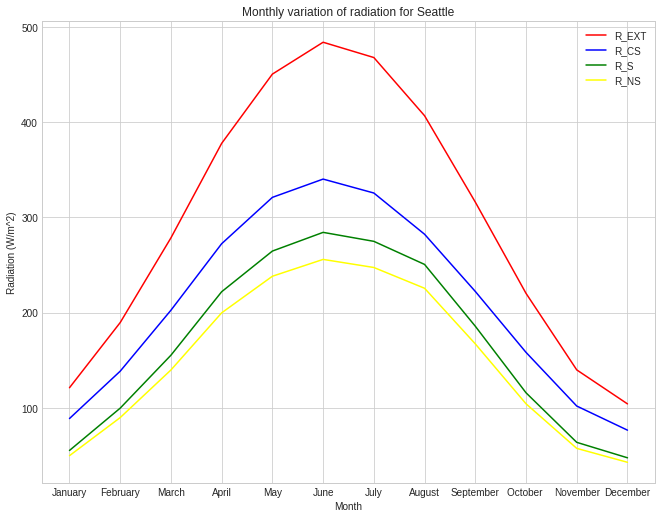

In [13]:
sea_fig=figure_plotter(df_sea,'Monthly variation of radiation for Seattle')

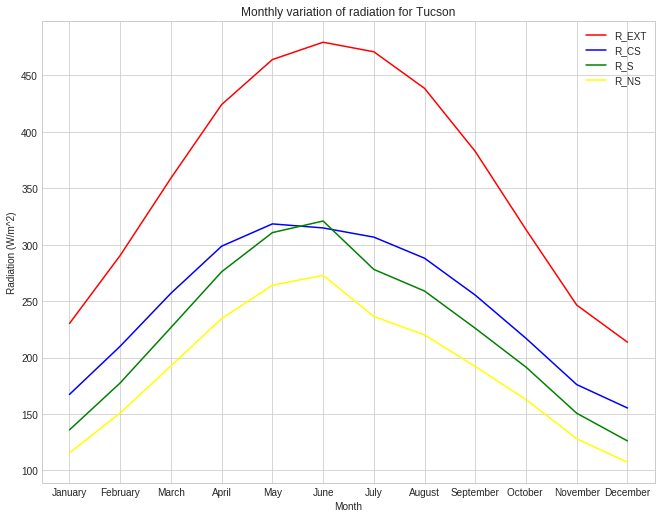

In [14]:
tuc_fig=figure_plotter(df_tuc,'Monthly variation of radiation for Tucson')

In [15]:
df_sea['PET']=(df_sea['R_NS']*0.8)/28.34
df_tuc['PET']=(df_tuc['R_NS']*0.8)/28.34

In [16]:
df_sea

,Month,J_Day,Tmin,Tmax,Tmean,R_EXT,R_CS,R_S,R_NS,PET
0,January,16,3,9,6.0,120.93,88.55,55.002396,49.502156,1.397379
1,February,47,3,11,7.0,189.44,138.33,99.492103,89.542892,2.527675
2,March,75,4,13,8.5,278.45,202.40,155.110218,139.599196,3.940697
3,April,106,6,16,11.0,377.79,272.31,221.831078,199.647970,5.635793
4,May,136,9,19,14.0,450.59,321.03,264.577848,238.120064,6.721808
5,June,167,12,22,17.0,484.08,340.24,284.242537,255.818283,7.221405
6,July,197,14,24,19.0,468.01,325.60,274.806540,247.325886,6.981676
7,August,228,14,25,19.5,406.83,282.27,250.542406,225.488166,6.365227
8,September,259,12,22,17.0,316.08,222.16,185.596144,167.036529,4.715216
9,October,289,8,16,12.0,220.14,158.10,115.615453,104.053908,2.937302


In [17]:
sea_mean_A_pet=df_sea.PET.mean()*365
tuc_mean_A_pet=df_tuc.PET.mean()*365


In [18]:
print("Mean annual potential et at Seattle in mm", sea_mean_A_pet)
print("Mean annual potential et at Tucson in mm", tuc_mean_A_pet)

Mean annual potential et at Seattle in mm 1559.14330662369
Mean annual potential et at Tucson in mm 1954.7183521772447


In [19]:
arid_seat=sea_mean_A_pet/map_sea
arid_tuc=tuc_mean_A_pet/map_tuc
print("Aridity index for Seattle is {} which means that it has sub humid climate".format(arid_seat))
print("Aridity index for Tucson is {} which means that it has arid climate".format(arid_tuc))

Aridity index for Seattle is 1.5909625577792756 which means that it has sub humid climate
Aridity index for Tucson is 6.10849485055389 which means that it has arid climate


In [20]:
amet_map_sea=(1+w_sea*arid_seat)/(1+w_sea*arid_seat+np.power(arid_seat,-1))
amet_map_tuc=(1+w_tuc*arid_tuc)/(1+w_tuc*arid_tuc+np.power(arid_tuc,-1))

In [21]:
mr_map_sea=1-amet_map_sea
mr_map_tuc=1-amet_map_tuc

In [22]:
print("Mean actual et_to_precip for Seattle is =",amet_map_sea)
print("Mean actual et_to_precip for Tucson is =",amet_map_tuc)
print("Mean actual runoff_to_precip for Seattle is =",mr_map_sea)
print("Mean actual runoff_to_precip for Tucson is =",mr_map_tuc)

Mean actual et_to_precip for Seattle is = 0.8693371757389197
Mean actual et_to_precip for Tucson is = 0.9774887352341315
Mean actual runoff_to_precip for Seattle is = 0.13066282426108033
Mean actual runoff_to_precip for Tucson is = 0.02251126476586851


In [23]:
sea_fig.savefig('Seattle_radiation.png',dpi=300,format='png')
tuc_fig.savefig('Tucson_radiation.png',dpi=300,format='png')

In [24]:
df_sea.to_csv('Seattle_Radiation.csv')
df_tuc.to_csv('Tucson_Radiation.csv')